In [1]:
from ucimlrepo import fetch_ucirepo 
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer
from scipy.spatial.distance import cdist
import time
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
from scipy.stats import kurtosis
from sklearn.decomposition import FastICA
from numpy import linalg
from sklearn.random_projection import GaussianRandomProjection
from sklearn import metrics
from itertools import product
from collections import defaultdict
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA
from kneed import KneeLocator
import seaborn as sns
import math
from sklearn.model_selection import train_test_split

In [2]:
# against original clusters
OG_clusters = [2, 2, 0, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 1, 0, 2, 0, 0, 2, 1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 2, 0, 0, 1, 0, 2, 1, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 0, 2, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 1, 0, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 0, 0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 2, 2, 2, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 0, 1, 2, 2, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 0, 2, 0, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 2, 0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 1, 1, 0, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2, 2, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 0, 1, 1, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 0, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 1, 2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 1, 0, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 0, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0, 2, 2, 2, 1, 1, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 2, 1, 2, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 1, 0, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 0, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 2, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1, 2, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 0, 2, 2, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1, 1, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1, 2, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 1, 1, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 2]

In [3]:
BC_clusters = [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0]

In [4]:
RANDOM_STATE = 101
seeds = [1, 10, 25, 50, 101]

In [5]:
# Wine Quality Data
# fetch dataset 
wq_df = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
wq_X = wq_df.data.features 
wq_y = wq_df.data.targets 

# Breast Cancer Data
# fetch dataset 
bc_df = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
bc_X = bc_df.data.features 
bc_y = bc_df.data.targets 

In [6]:
# Split into training and testing sets. Don't use test set until the very end
bc_X, X_test, bc_y, y_test = train_test_split(bc_X, bc_y, test_size=.2, random_state=RANDOM_STATE, stratify = bc_y)
# Split into training and testing sets. Don't use test set until the very end
wq_X, X_test, wq_y, y_test = train_test_split(wq_X, wq_y, test_size=.2, random_state=RANDOM_STATE, stratify = wq_y)

In [7]:
# Standardized data
scaler = MinMaxScaler()
wq_scaled = scaler.fit_transform(wq_X)
bc_scaled = scaler.fit_transform(bc_X)

## Wine Quality

{0, 1, 2, 3}


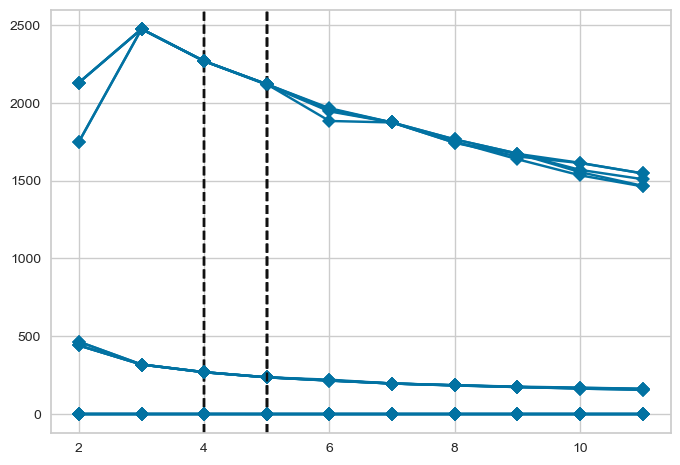

In [8]:
# PCA
pca = PCA(n_components = 4, random_state=RANDOM_STATE)
wq_pca = pca.fit_transform(wq_scaled)

pca_d = []
pca_s = []
pca_c = []
ys1 = []
cs1 = []

for seed in seeds:
    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,12), timings=False)
    visualizer.fit(wq_pca)
    distortion1 = visualizer.k_scores_
    pca_d.append(distortion1)

    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', locate_elbow=False, timings=False)
    visualizer.fit(wq_pca)
    sil1 = visualizer.k_scores_
    pca_s.append(sil1)
    
    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', locate_elbow=False, timings=False)
    visualizer.fit(wq_pca)
    ch1 = visualizer.k_scores_
    pca_c.append(ch1)
    
kmeans = KMeans(n_clusters=4, random_state=seed, n_init='auto')
kmeans.fit(wq_pca)
y_kmeans1 = kmeans.predict(wq_pca)
# ys1.append(y_kmeans)
centers1 = kmeans.cluster_centers_
# cs1.append(centers)

# y_kmeans1 = np.round(np.mean(ys1, axis=0))
# centers1 = np.mean(cs1, axis=0)
print(set(y_kmeans1))

distortion1 = np.mean(pca_d, axis=0)
d_elbow1 = KneeLocator(np.arange(2, 12), distortion1, curve='convex', direction='decreasing').knee
sil1 = np.mean(pca_s, axis=0)
ch1 = np.mean(pca_c, axis=0)

In [9]:
quality = list(wq_y['quality'])
        
        
ri = metrics.rand_score(quality, y_kmeans1)
print('Rand Index: ', ri)        
ari = metrics.adjusted_rand_score(quality, y_kmeans1)
print('Adjusted Rand Index: ', ari)
ami = metrics.adjusted_mutual_info_score(quality, y_kmeans1) 
print('Adjusted Mutual Info Score: ', ami)
nmi = metrics.normalized_mutual_info_score(quality, y_kmeans1)  
print('Normalized Mutual Info Score: ', nmi)
homo = metrics.homogeneity_score(quality, y_kmeans1)
print('Homogeneity Score: ', homo)
cs = metrics.completeness_score(quality, y_kmeans1)
print('Completeness Score: ', cs)
v = metrics.v_measure_score(quality, y_kmeans1)
print('V Measure Score: ', v)

Rand Index:  0.5916409256657961
Adjusted Rand Index:  0.06124090113809588
Adjusted Mutual Info Score:  0.07886163893572537
Normalized Mutual Info Score:  0.08017227180092315
Homogeneity Score:  0.0796598495206134
Completeness Score:  0.08069132920766751
V Measure Score:  0.08017227180092314


In [10]:
ri = metrics.rand_score(OG_clusters, y_kmeans1)
print('Rand Index: ', ri)        
ari = metrics.adjusted_rand_score(OG_clusters, y_kmeans1)
print('Adjusted Rand Index: ', ari)
ami = metrics.adjusted_mutual_info_score(OG_clusters, y_kmeans1) 
print('Adjusted Mutual Info Score: ', ami)
nmi = metrics.normalized_mutual_info_score(OG_clusters, y_kmeans1)  
print('Normalized Mutual Info Score: ', nmi)
homo = metrics.homogeneity_score(OG_clusters, y_kmeans1)
print('Homogeneity Score: ', homo)
cs = metrics.completeness_score(OG_clusters, y_kmeans1)
print('Completeness Score: ', cs)
v = metrics.v_measure_score(OG_clusters, y_kmeans1)
print('V Measure Score: ', v)

Rand Index:  0.5553817022700519
Adjusted Rand Index:  -0.0009090350262068794
Adjusted Mutual Info Score:  -0.00013231400397557033
Normalized Mutual Info Score:  0.0003647099563988636
Homogeneity Score:  0.00039702651320288186
Completeness Score:  0.0003372583195929743
V Measure Score:  0.0003647099563988636


{1.0, 2.0, 3.0, 4.0}


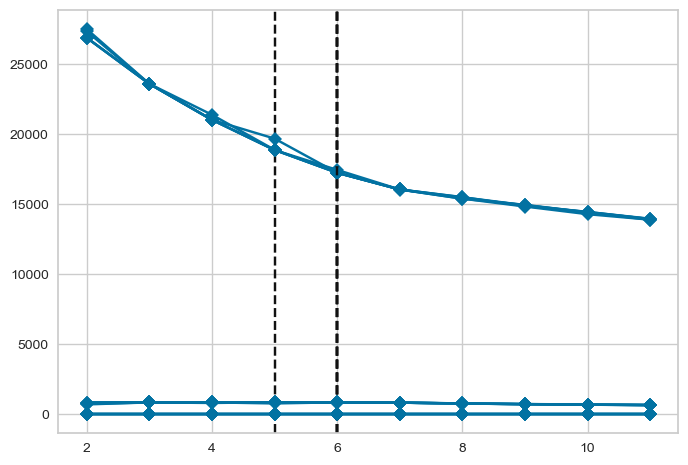

In [11]:
# ICA

ica = FastICA(n_components=6, random_state=RANDOM_STATE)
wq_ica = ica.fit_transform(wq_scaled)

ica_d = []
ica_s = []
ica_c = []
ys2 = []
cs2 = []

for seed in seeds:

    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,12), timings=False)
    visualizer.fit(wq_ica)
    distortion2 = visualizer.k_scores_
    ica_d.append(distortion2)

    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', locate_elbow=False, timings=False)
    visualizer.fit(wq_ica)
    sil2 = visualizer.k_scores_
    ica_s.append(sil2)
    
    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', locate_elbow=False, timings=False)
    visualizer.fit(wq_ica)
    ch2 = visualizer.k_scores_
    ica_c.append(ch2)
    
    kmeans = KMeans(n_clusters=6, random_state=seed, n_init='auto')
    kmeans.fit(wq_ica)
    y_kmeans = kmeans.predict(wq_ica)
    ys2.append(y_kmeans)
    centers = kmeans.cluster_centers_
    cs2.append(centers)

y_kmeans2 = np.round(np.mean(ys2, axis=0))
centers2 = np.mean(cs2, axis=0)
print(set(y_kmeans2))

distortion2 = np.mean(ica_d, axis=0)
d_elbow2 = KneeLocator(np.arange(2, 12), distortion2, curve='convex', direction='decreasing').knee
sil2 = np.mean(ica_s, axis=0)
ch2 = np.mean(ica_c, axis=0)

{0.0, 1.0}


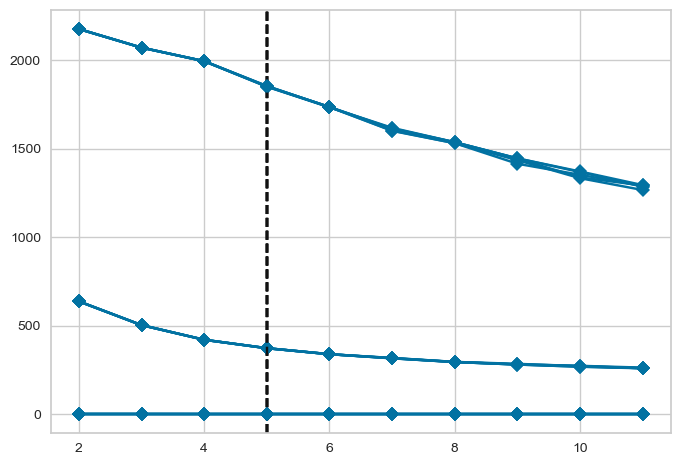

In [12]:
# Random Projection

rp = GaussianRandomProjection(n_components=11, random_state=RANDOM_STATE)
wq_rp = rp.fit_transform(wq_scaled)
# reconstructed_X = rp.inverse_transform(X_reduced)

rp_d = []
rp_s = []
rp_c = []
ys3 = []
cs3 = []

for seed in seeds:

    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,12), timings=False)
    visualizer.fit(wq_rp)
    distortion3 = visualizer.k_scores_
    rp_d.append(distortion3)

    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', locate_elbow=False, timings=False)
    visualizer.fit(wq_rp)
    sil3 = visualizer.k_scores_
    rp_s.append(sil3)
    
    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', locate_elbow=False, timings=False)
    visualizer.fit(wq_rp)
    ch3 = visualizer.k_scores_
    rp_c.append(ch3)
    
    kmeans = KMeans(n_clusters=2, random_state=seed, n_init='auto')
    kmeans.fit(wq_rp)
    y_kmeans = kmeans.predict(wq_rp)
    ys3.append(y_kmeans)
    centers = kmeans.cluster_centers_
    cs3.append(centers)

y_kmeans3 = np.round(np.mean(ys3, axis=0))
centers3 = np.mean(cs3, axis=0)
print(set(y_kmeans3))

distortion3 = np.mean(rp_d, axis=0)
d_elbow3 = KneeLocator(np.arange(2, 12), distortion3, curve='convex', direction='decreasing').knee
sil3 = np.mean(rp_s, axis=0)
ch3 = np.mean(rp_c, axis=0)

{0.0, 1.0}


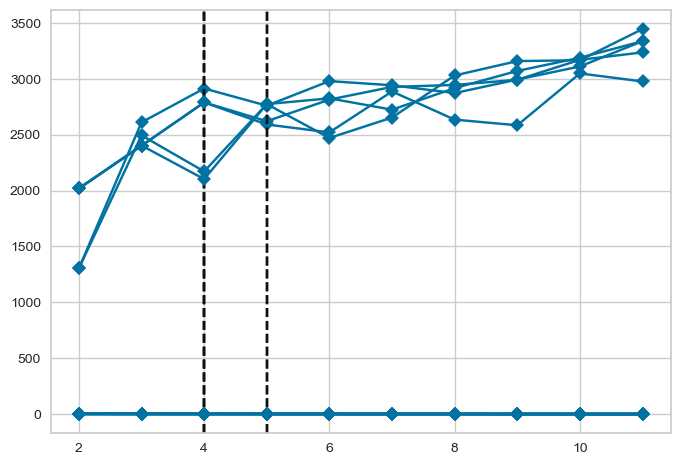

In [13]:
# LLE

lle = LocallyLinearEmbedding(n_neighbors=10, n_components=4, random_state=RANDOM_STATE, n_jobs=-1)
wq_lle = lle.fit_transform(wq_scaled)

lle_d = []
lle_s = []
lle_c = []
ys4 = []
cs4 = []

for seed in seeds:

    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,12), timings=False)
    visualizer.fit(wq_lle)
    distortion4 = visualizer.k_scores_
    lle_d.append(distortion4)

    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', locate_elbow=False, timings=False)
    visualizer.fit(wq_lle)
    sil4 = visualizer.k_scores_
    lle_s.append(sil4)
    
    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', locate_elbow=False, timings=False)
    visualizer.fit(wq_lle)
    ch4 = visualizer.k_scores_
    lle_c.append(ch4)
    
    kmeans = KMeans(n_clusters=2, random_state=seed, n_init='auto')
    kmeans.fit(wq_lle)
    y_kmeans = kmeans.predict(wq_lle)
    ys4.append(y_kmeans)
    centers = kmeans.cluster_centers_
    cs4.append(centers)

y_kmeans4 = np.round(np.mean(ys4, axis=0))
centers4 = np.mean(cs4, axis=0)
print(set(y_kmeans4))
    
distortion4 = np.mean(lle_d, axis=0)
d_elbow4 = KneeLocator(np.arange(2, 12), distortion4, curve='convex', direction='decreasing').knee
sil4 = np.mean(lle_s, axis=0)
ch4 = np.mean(lle_c, axis=0)

In [14]:
quality = list(wq_y['quality'])
        
        
ri = metrics.rand_score(quality, y_kmeans4)
print('Rand Index: ', ri)        
ari = metrics.adjusted_rand_score(quality, y_kmeans4)
print('Adjusted Rand Index: ', ari)
ami = metrics.adjusted_mutual_info_score(quality, y_kmeans4) 
print('Adjusted Mutual Info Score: ', ami)
nmi = metrics.normalized_mutual_info_score(quality, y_kmeans4)  
print('Normalized Mutual Info Score: ', nmi)
homo = metrics.homogeneity_score(quality, y_kmeans4)
print('Homogeneity Score: ', homo)
cs = metrics.completeness_score(quality, y_kmeans4)
print('Completeness Score: ', cs)
v = metrics.v_measure_score(quality, y_kmeans4)
print('V Measure Score: ', v)

Rand Index:  0.32945851836413587
Adjusted Rand Index:  0.0010813118846178865
Adjusted Mutual Info Score:  0.003177502366920026
Normalized Mutual Info Score:  0.0037133372410936786
Homogeneity Score:  0.0018637853090425816
Completeness Score:  0.4862418385750267
V Measure Score:  0.0037133372410936786


In [15]:
ri = metrics.rand_score(OG_clusters, y_kmeans4)
print('Rand Index: ', ri)        
ari = metrics.adjusted_rand_score(OG_clusters, y_kmeans4)
print('Adjusted Rand Index: ', ari)
ami = metrics.adjusted_mutual_info_score(OG_clusters, y_kmeans4) 
print('Adjusted Mutual Info Score: ', ami)
nmi = metrics.normalized_mutual_info_score(OG_clusters, y_kmeans4)  
print('Normalized Mutual Info Score: ', nmi)
homo = metrics.homogeneity_score(OG_clusters, y_kmeans4)
print('Homogeneity Score: ', homo)
cs = metrics.completeness_score(OG_clusters, y_kmeans4)
print('Completeness Score: ', cs)
v = metrics.v_measure_score(OG_clusters, y_kmeans4)
print('V Measure Score: ', v)

Rand Index:  0.3530089233988401
Adjusted Rand Index:  -8.6146971154236e-06
Adjusted Mutual Info Score:  1.8200097237868228e-05
Normalized Mutual Info Score:  0.00047140083143803774
Homogeneity Score:  0.0002367777441807386
Completeness Score:  0.05180278319884367
V Measure Score:  0.00047140083143803774


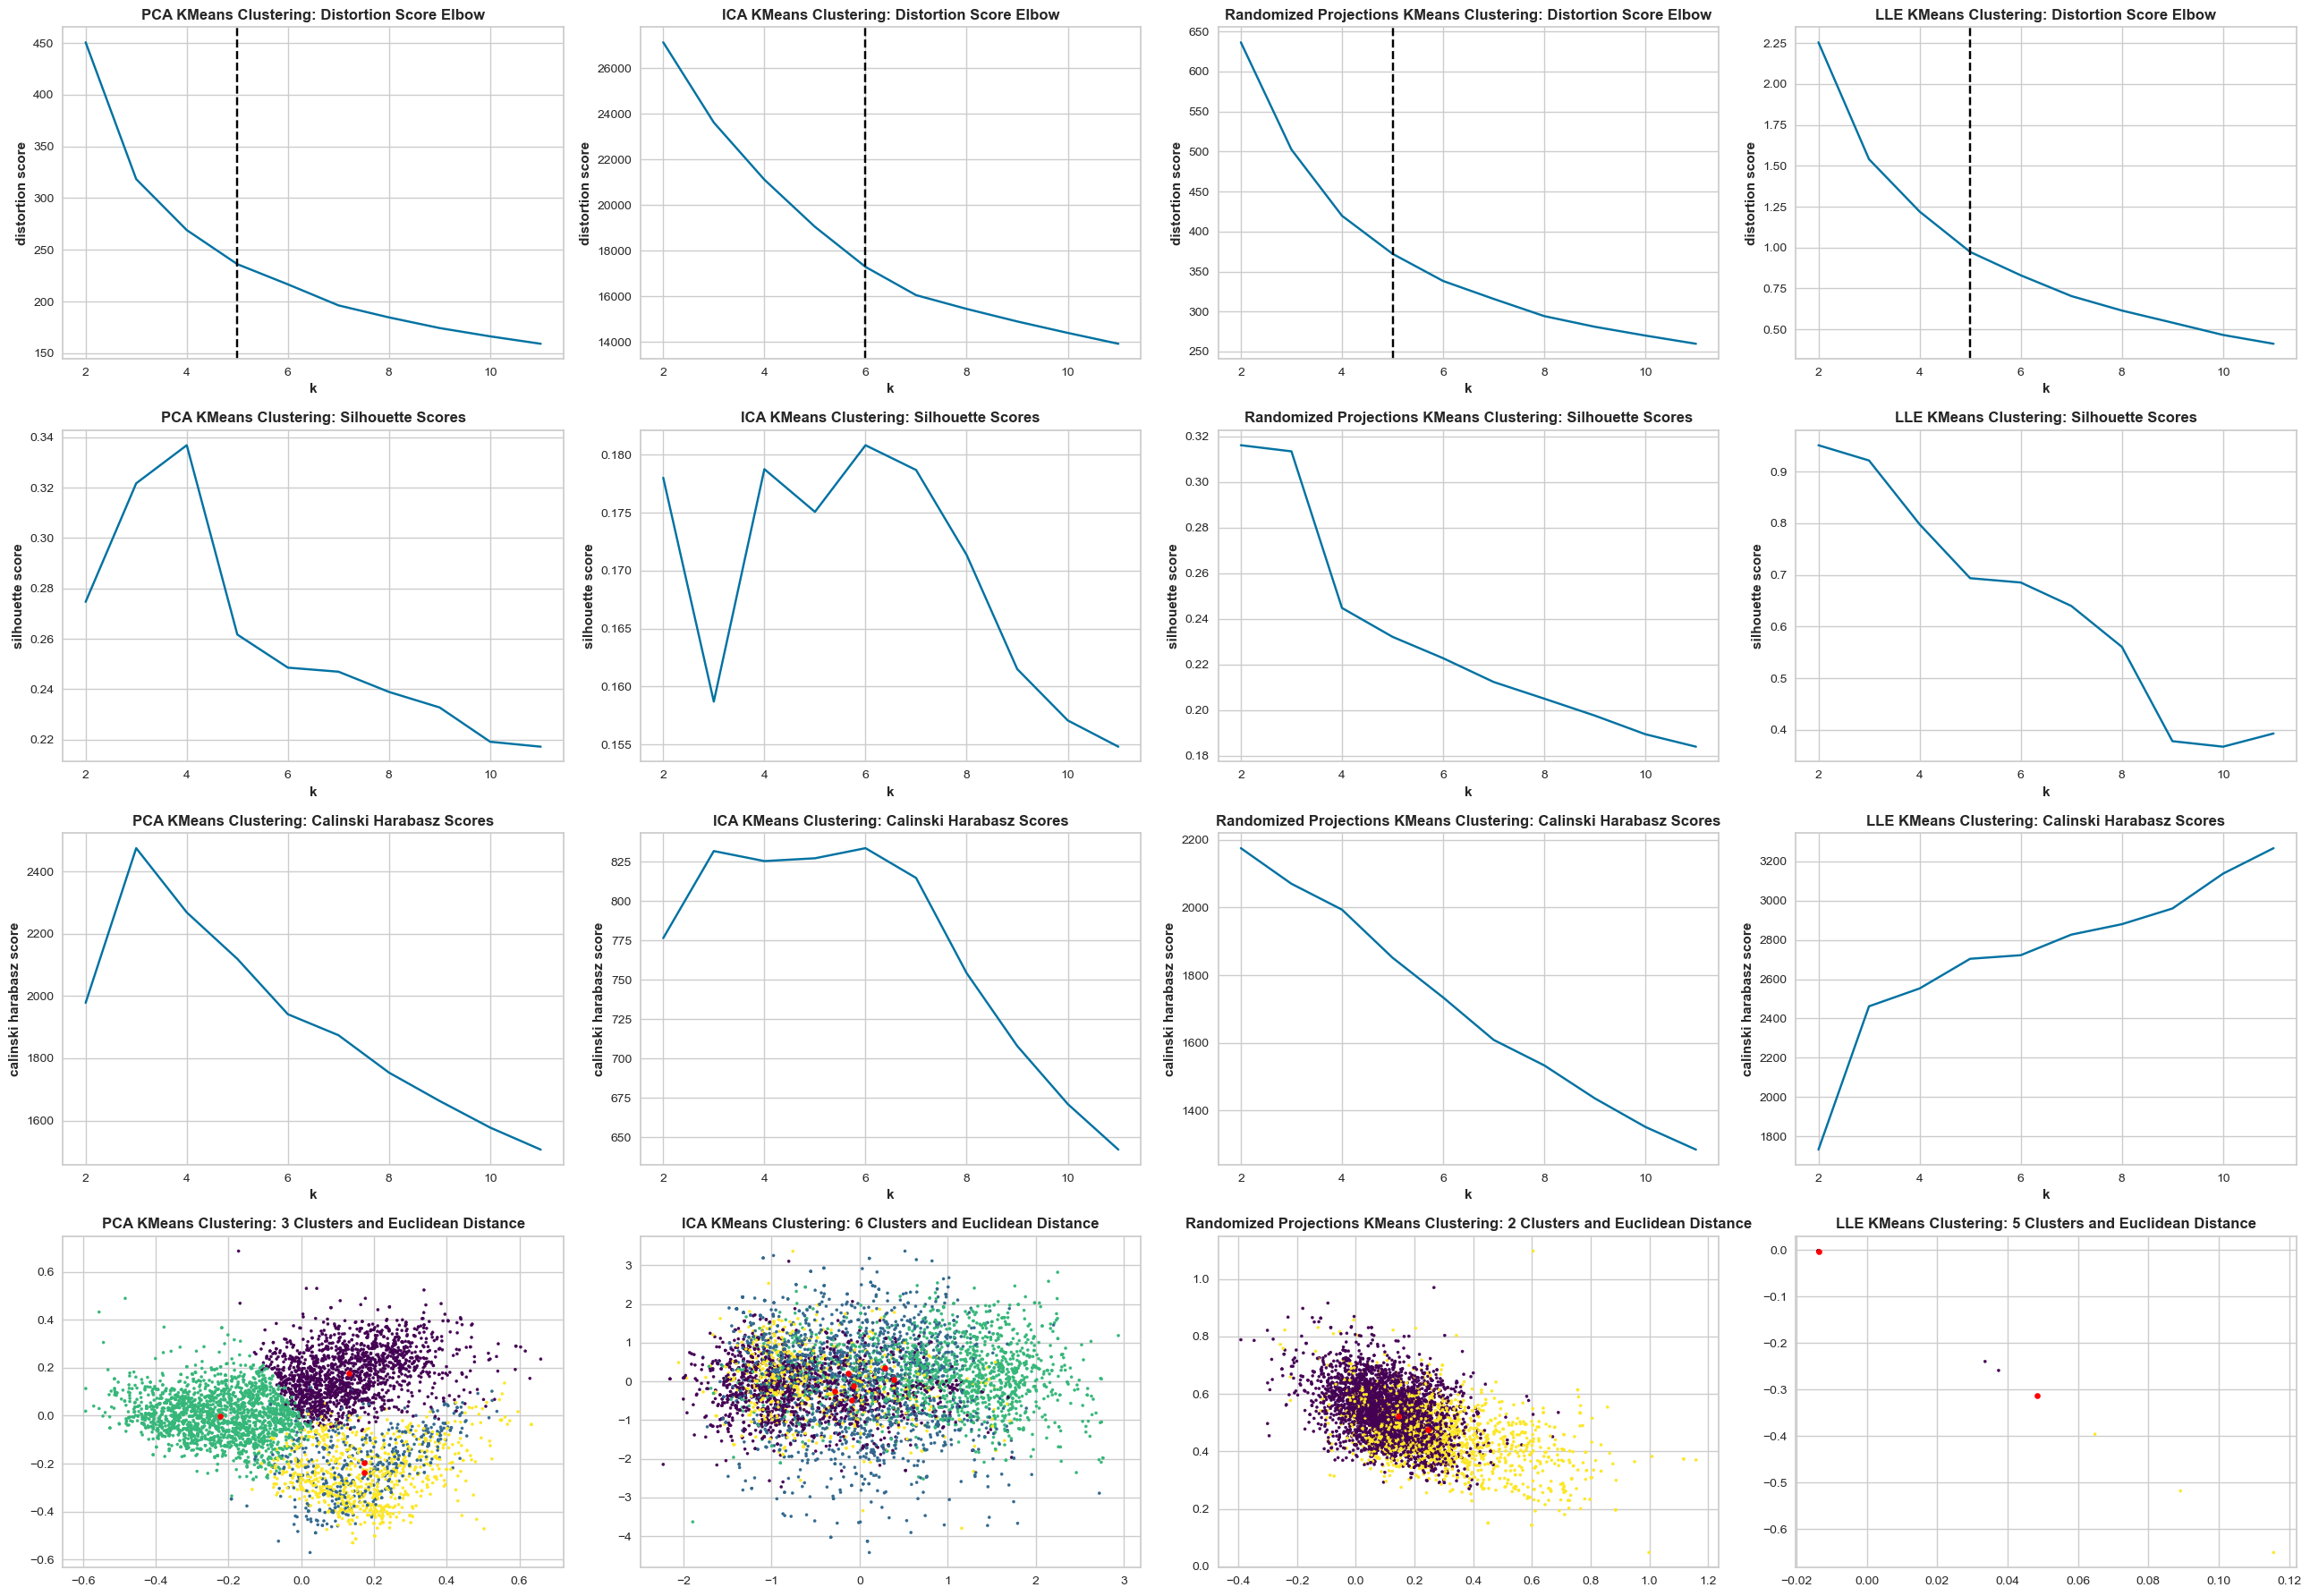

In [16]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16)) = plt.subplots(4, 4, figsize=(26, 18))
rcParams['font.weight'] = 'bold'
legend_properties = {'weight':'bold'}

###### PCA ######

pca_range = np.arange(2, 12)
ax1.plot(pca_range, distortion1, color='b')
ax1.axvline(x = d_elbow1, color='black', linestyle='--')
ax1.set_title('PCA KMeans Clustering: Distortion Score Elbow', weight='bold')
ax1.set_ylabel('distortion score', weight='bold')
ax1.set_xlabel('k', weight='bold')
ax1.grid(True)

ax5.plot(pca_range, sil1, color='b')
ax5.set_title('PCA KMeans Clustering: Silhouette Scores', weight='bold')
ax5.set_ylabel('silhouette score', weight='bold')
ax5.set_xlabel('k', weight='bold')
ax5.grid(True)

ax9.plot(pca_range, ch1, color='b')
ax9.set_title('PCA KMeans Clustering: Calinski Harabasz Scores', weight='bold')
ax9.set_ylabel('calinski harabasz score', weight='bold')
ax9.set_xlabel('k', weight='bold')
ax9.grid(True)

ax13.scatter(wq_pca[:, 0], wq_pca[:, 1], c=y_kmeans1, cmap='viridis', s=5)
ax13.scatter(centers1[:, 0], centers1[:, 1], c='red', s=20)
ax13.set_title('PCA KMeans Clustering: 3 Clusters and Euclidean Distance', weight='bold')


###### ICA ######

ica_range = np.arange(2, 12)
ax2.plot(ica_range, distortion2, color='b')
ax2.axvline(x = d_elbow2, color='black', linestyle='--')
ax2.set_title('ICA KMeans Clustering: Distortion Score Elbow', weight='bold')
ax2.set_ylabel('distortion score', weight='bold')
ax2.set_xlabel('k', weight='bold')
ax2.grid(True)

ax6.plot(ica_range, sil2, color='b')
ax6.set_title('ICA KMeans Clustering: Silhouette Scores', weight='bold')
ax6.set_ylabel('silhouette score', weight='bold')
ax6.set_xlabel('k', weight='bold')
ax6.grid(True)

ax10.plot(ica_range, ch2, color='b')
ax10.set_title('ICA KMeans Clustering: Calinski Harabasz Scores', weight='bold')
ax10.set_ylabel('calinski harabasz score', weight='bold')
ax10.set_xlabel('k', weight='bold')
ax10.grid(True)

ax14.scatter(wq_ica[:, 0], wq_ica[:, 1], c=y_kmeans2, cmap='viridis', s=5)
ax14.scatter(centers2[:, 0], centers2[:, 1], c='red', s=20)
ax14.set_title('ICA KMeans Clustering: 6 Clusters and Euclidean Distance', weight='bold')


###### Randomized Projections #######

rp_range = np.arange(2, 12)
ax3.plot(rp_range, distortion3, color='b')
ax3.axvline(x = d_elbow3, color='black', linestyle='--')
ax3.set_title('Randomized Projections KMeans Clustering: Distortion Score Elbow', weight='bold')
ax3.set_ylabel('distortion score', weight='bold')
ax3.set_xlabel('k', weight='bold')
ax3.grid(True)

ax7.plot(rp_range, sil3, color='b')
ax7.set_title('Randomized Projections KMeans Clustering: Silhouette Scores', weight='bold')
ax7.set_ylabel('silhouette score', weight='bold')
ax7.set_xlabel('k', weight='bold')
ax7.grid(True)

ax11.plot(rp_range, ch3, color='b')
ax11.set_title('Randomized Projections KMeans Clustering: Calinski Harabasz Scores', weight='bold')
ax11.set_ylabel('calinski harabasz score', weight='bold')
ax11.set_xlabel('k', weight='bold')
ax11.grid(True)

ax15.scatter(wq_rp[:, 0], wq_rp[:, 1], c=y_kmeans3, cmap='viridis', s=5)
ax15.scatter(centers3[:, 0], centers3[:, 1], c='red', s=20)
ax15.set_title('Randomized Projections KMeans Clustering: 2 Clusters and Euclidean Distance', weight='bold')

###### LLE ######

lle_range = np.arange(2, 12)
ax4.plot(lle_range, distortion4, color='b')
ax4.axvline(x = d_elbow4, color='black', linestyle='--')
ax4.set_title('LLE KMeans Clustering: Distortion Score Elbow', weight='bold')
ax4.set_ylabel('distortion score', weight='bold')
ax4.set_xlabel('k', weight='bold')
ax4.grid(True)

ax8.plot(lle_range, sil4, color='b')
ax8.set_title('LLE KMeans Clustering: Silhouette Scores', weight='bold')
ax8.set_ylabel('silhouette score', weight='bold')
ax8.set_xlabel('k', weight='bold')
ax8.grid(True)

ax12.plot(lle_range, ch4, color='b')
ax12.set_title('LLE KMeans Clustering: Calinski Harabasz Scores', weight='bold')
ax12.set_ylabel('calinski harabasz score', weight='bold')
ax12.set_xlabel('k', weight='bold')
ax12.grid(True)

ax16.scatter(wq_lle[:, 0], wq_lle[:, 1], c=y_kmeans4, cmap='viridis', s=5)
ax16.scatter(centers4[:, 0], centers4[:, 1], c='red', s=20)
ax16.set_title('LLE KMeans Clustering: 5 Clusters and Euclidean Distance', weight='bold')

fig.tight_layout()
plt.savefig(f'plots/dim_red_clustering/wq_kmeans.png', dpi=1200)
plt.show()

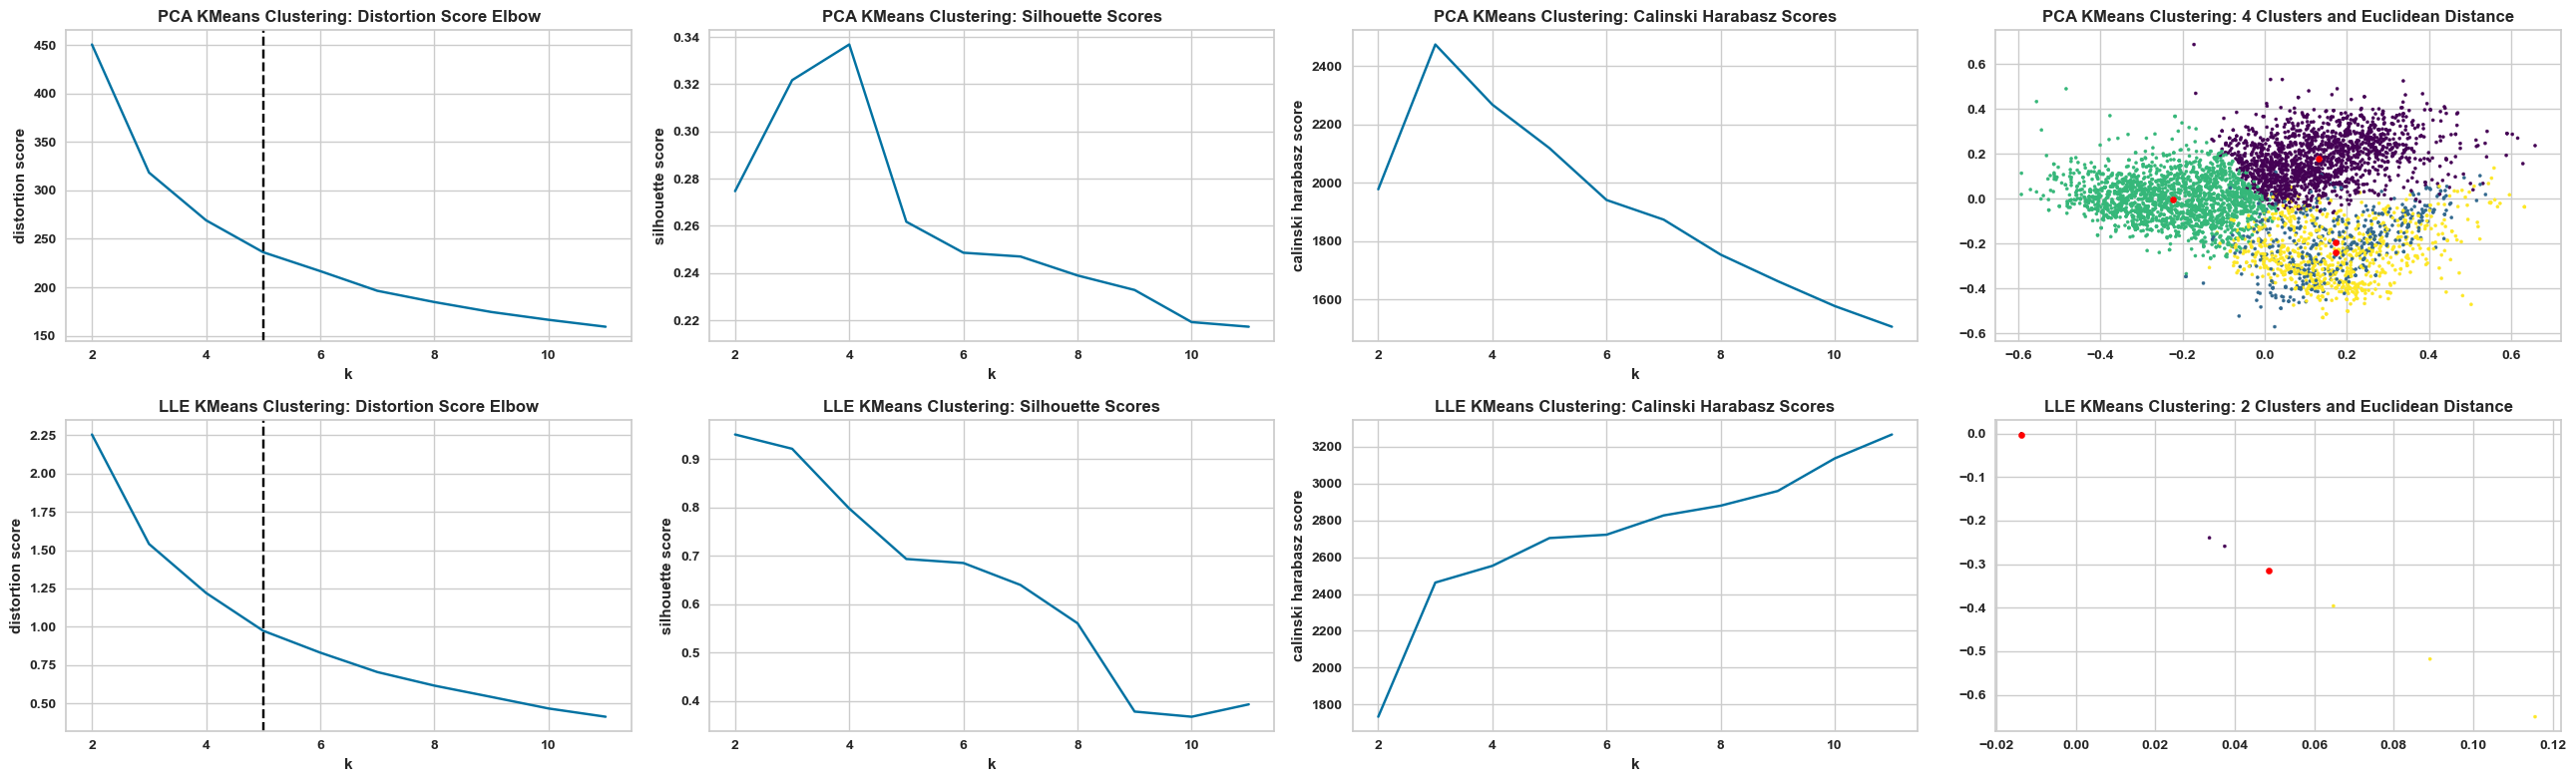

In [17]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(26, 8))
rcParams['font.weight'] = 'bold'
legend_properties = {'weight':'bold'}

###### PCA ######

pca_range = np.arange(2, 12)
ax1.plot(pca_range, distortion1, color='b')
ax1.axvline(x = d_elbow1, color='black', linestyle='--')
ax1.set_title('PCA KMeans Clustering: Distortion Score Elbow', weight='bold')
ax1.set_ylabel('distortion score', weight='bold')
ax1.set_xlabel('k', weight='bold')
ax1.grid(True)

ax2.plot(pca_range, sil1, color='b')
ax2.set_title('PCA KMeans Clustering: Silhouette Scores', weight='bold')
ax2.set_ylabel('silhouette score', weight='bold')
ax2.set_xlabel('k', weight='bold')
ax2.grid(True)

ax3.plot(pca_range, ch1, color='b')
ax3.set_title('PCA KMeans Clustering: Calinski Harabasz Scores', weight='bold')
ax3.set_ylabel('calinski harabasz score', weight='bold')
ax3.set_xlabel('k', weight='bold')
ax3.grid(True)

ax4.scatter(wq_pca[:, 0], wq_pca[:, 1], c=y_kmeans1, cmap='viridis', s=5)
ax4.scatter(centers1[:, 0], centers1[:, 1], c='red', s=20)
ax4.set_title('PCA KMeans Clustering: 4 Clusters and Euclidean Distance', weight='bold')

###### LLE ######

lle_range = np.arange(2, 12)
ax5.plot(lle_range, distortion4, color='b')
ax5.axvline(x = d_elbow4, color='black', linestyle='--')
ax5.set_title('LLE KMeans Clustering: Distortion Score Elbow', weight='bold')
ax5.set_ylabel('distortion score', weight='bold')
ax5.set_xlabel('k', weight='bold')
ax5.grid(True)

ax6.plot(lle_range, sil4, color='b')
ax6.set_title('LLE KMeans Clustering: Silhouette Scores', weight='bold')
ax6.set_ylabel('silhouette score', weight='bold')
ax6.set_xlabel('k', weight='bold')
ax6.grid(True)

ax7.plot(lle_range, ch4, color='b')
ax7.set_title('LLE KMeans Clustering: Calinski Harabasz Scores', weight='bold')
ax7.set_ylabel('calinski harabasz score', weight='bold')
ax7.set_xlabel('k', weight='bold')
ax7.grid(True)

ax8.scatter(wq_lle[:, 0], wq_lle[:, 1], c=y_kmeans4, cmap='viridis', s=5)
ax8.scatter(centers4[:, 0], centers4[:, 1], c='red', s=20)
ax8.set_title('LLE KMeans Clustering: 2 Clusters and Euclidean Distance', weight='bold')

plt.tight_layout()
plt.savefig(f'plots/dim_red_clustering/wq_kmeans_mini.png', dpi=600)

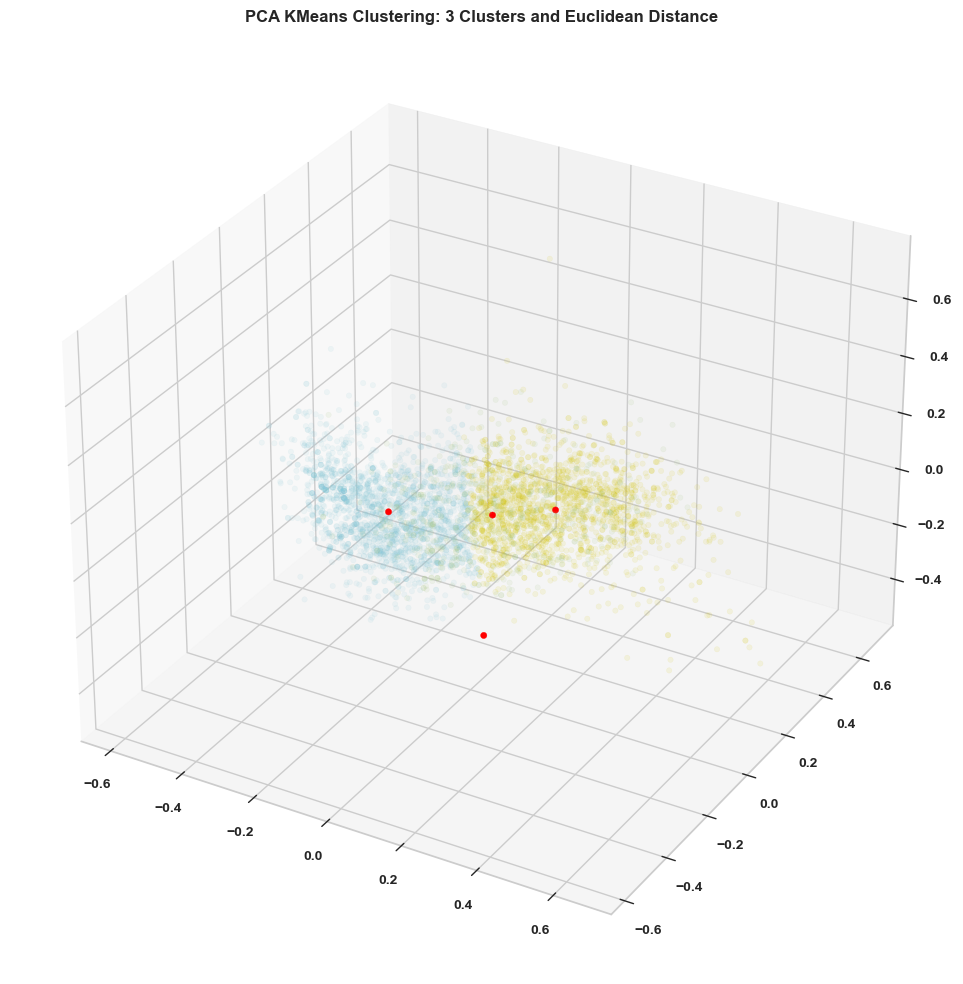

In [18]:
# PCA 3D
rcParams['font.weight'] = 'bold'
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = '3d')

x = np.array(y_kmeans1==0)
y = np.array(y_kmeans1==1)
z = np.array(y_kmeans1==2)

ax.scatter(centers1[:,0],centers1[:,1],centers1[:,2],c="red",s=20,label="Centers",alpha=1)
ax.scatter(wq_pca[x,0],wq_pca[x,1],wq_pca[x,2],c="y",s=15,label="C1", alpha=.1)
ax.scatter(wq_pca[y,0],wq_pca[y,1],wq_pca[y,2],c="g",s=15,label="C2", alpha=.1)
ax.scatter(wq_pca[z,0],wq_pca[z,1],wq_pca[z,2],c="c",s=15,label="C3", alpha=.1)
ax.set_title('PCA KMeans Clustering: 3 Clusters and Euclidean Distance', weight='bold')
plt.tight_layout()
plt.savefig(f'plots/dim_red_clustering/wq_kmeans_pca_3d.png', dpi=600)

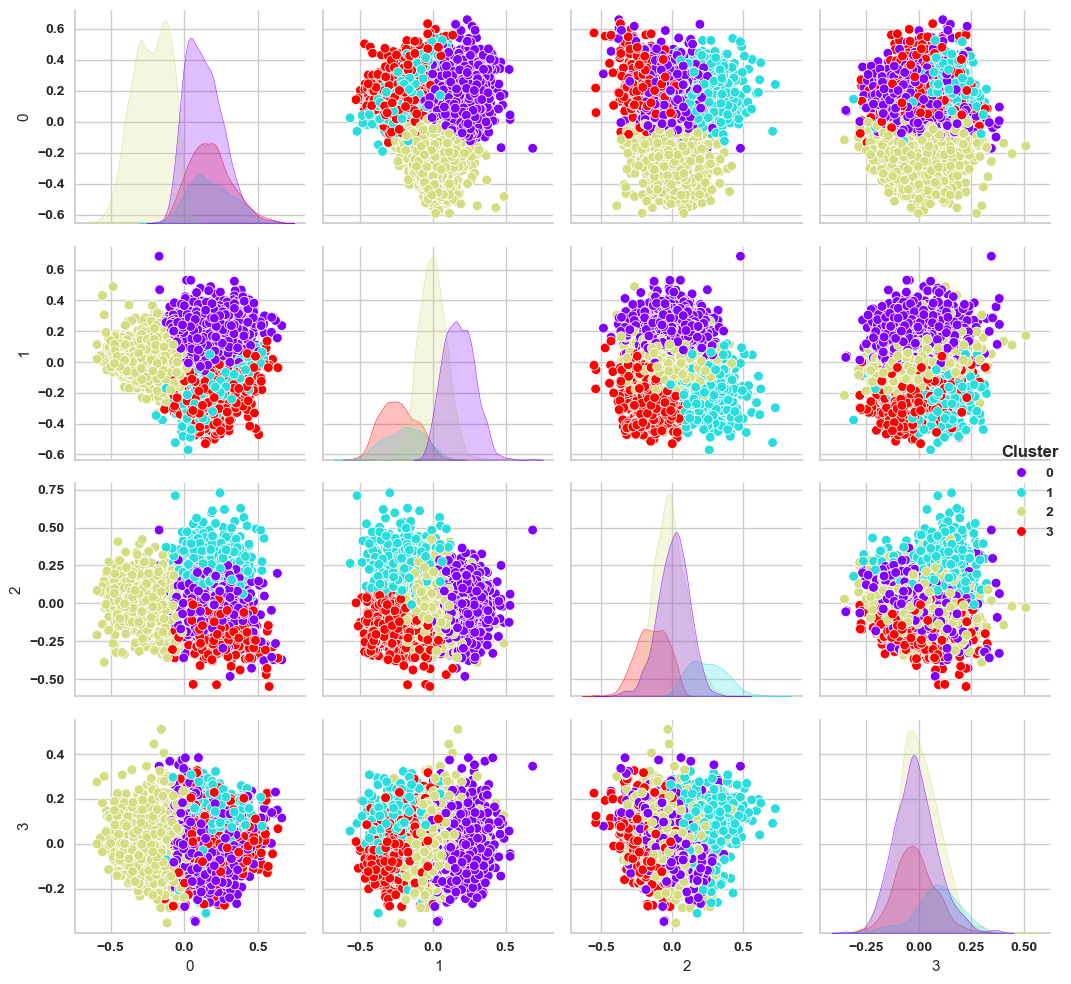

In [19]:
# PCA Pairplot
wq_df = pd.DataFrame(wq_pca)
wq_df['Cluster'] = y_kmeans1
g = sns.pairplot(wq_df, hue="Cluster", palette='rainbow')
plt.tight_layout()
plt.savefig(f'plots/dim_red_clustering/wq_kmeans_pca_pairplot.png', dpi=600)

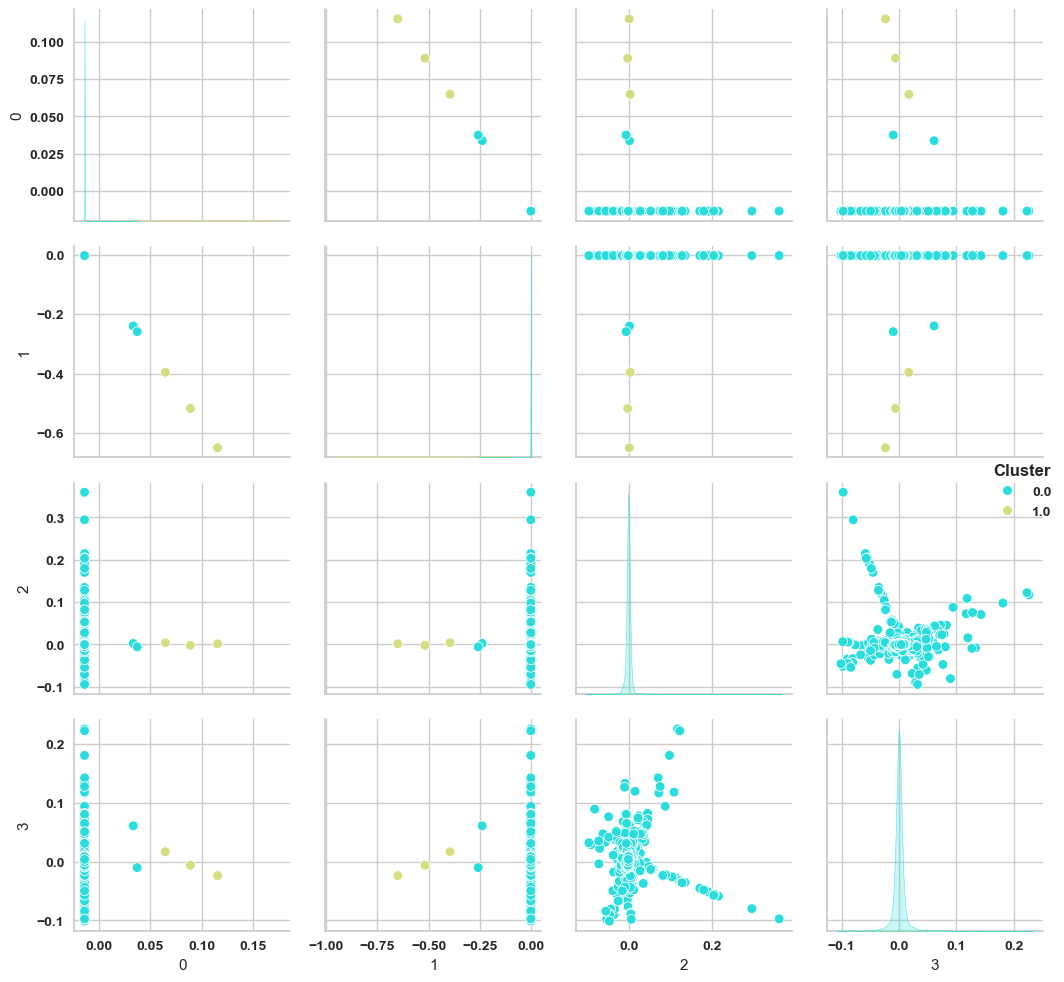

In [20]:
# LLE Pairplot
wq_df = pd.DataFrame(wq_lle)
wq_df['Cluster'] = y_kmeans4
g = sns.pairplot(wq_df, hue="Cluster", palette='rainbow')
plt.tight_layout()
plt.savefig(f'plots/dim_red_clustering/wq_kmeans_lle_pairplot.png', dpi=600)

In [21]:
print(set(y_kmeans1))
print(set(y_kmeans4))

{0, 1, 2, 3}
{0.0, 1.0}


## Breast Cancer

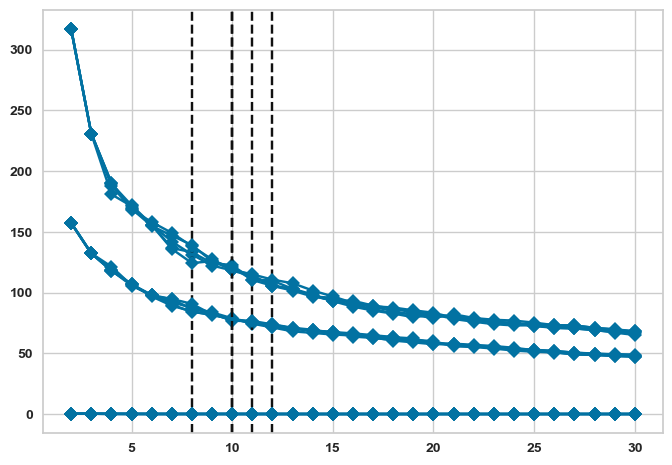

In [22]:
# PCA
pca = PCA(n_components = 6, random_state=RANDOM_STATE)
bc_pca = pca.fit_transform(bc_scaled)

pca_d = []
pca_s = []
pca_c = []
ys1 = []
cs1 = []

for seed in seeds:
    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,31), timings=False)
    visualizer.fit(bc_pca)
    distortion1 = visualizer.k_scores_
    pca_d.append(distortion1)

    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,31), metric='silhouette', locate_elbow=False, timings=False)
    visualizer.fit(bc_pca)
    sil1 = visualizer.k_scores_
    pca_s.append(sil1)
    
    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,31), metric='calinski_harabasz', locate_elbow=False, timings=False)
    visualizer.fit(bc_pca)
    ch1 = visualizer.k_scores_
    pca_c.append(ch1)
    
    kmeans = KMeans(n_clusters=2, random_state=seed, n_init='auto')
    kmeans.fit(bc_pca)
    y_kmeans = kmeans.predict(bc_pca)
    ys1.append(y_kmeans)
    centers = kmeans.cluster_centers_
    cs1.append(centers)

y_kmeans1 = np.round(np.mean(ys1, axis=0))
centers1 = np.mean(cs1, axis=0)

distortion1 = np.mean(pca_d, axis=0)
d_elbow1 = KneeLocator(np.arange(2, 31), distortion1, curve='convex', direction='decreasing').knee
sil1 = np.mean(pca_s, axis=0)
ch1 = np.mean(pca_c, axis=0)

In [23]:
diagnosis = list(bc_y['Diagnosis'])
for i in range(len(diagnosis)):
    if diagnosis[i] == 'M':
        diagnosis[i] = 1
    else:
        diagnosis[i] = 0
        
        
ri = metrics.rand_score(diagnosis, y_kmeans1)
print('Rand Index: ', ri)        
ari = metrics.adjusted_rand_score(diagnosis, y_kmeans1)
print('Adjusted Rand Index: ', ari)
ami = metrics.adjusted_mutual_info_score(diagnosis, y_kmeans1) 
print('Adjusted Mutual Info Score: ', ami)
nmi = metrics.normalized_mutual_info_score(diagnosis, y_kmeans1)  
print('Normalized Mutual Info Score: ', nmi)
homo = metrics.homogeneity_score(diagnosis, y_kmeans1)
print('Homogeneity Score: ', homo)
cs = metrics.completeness_score(diagnosis, y_kmeans1)
print('Completeness Score: ', cs)
v = metrics.v_measure_score(diagnosis, y_kmeans1)
print('V Measure Score: ', v)

Rand Index:  0.8502589921092124
Adjusted Rand Index:  0.69866298740304
Adjusted Mutual Info Score:  0.5817204725548439
Normalized Mutual Info Score:  0.5824293000067386
Homogeneity Score:  0.5738867714481606
Completeness Score:  0.591229989128874
V Measure Score:  0.5824293000067386


In [24]:
ri = metrics.rand_score(BC_clusters, y_kmeans1)
print('Rand Index: ', ri)        
ari = metrics.adjusted_rand_score(BC_clusters, y_kmeans1)
print('Adjusted Rand Index: ', ari)
ami = metrics.adjusted_mutual_info_score(BC_clusters, y_kmeans1) 
print('Adjusted Mutual Info Score: ', ami)
nmi = metrics.normalized_mutual_info_score(BC_clusters, y_kmeans1)  
print('Normalized Mutual Info Score: ', nmi)
homo = metrics.homogeneity_score(BC_clusters, y_kmeans1)
print('Homogeneity Score: ', homo)
cs = metrics.completeness_score(BC_clusters, y_kmeans1)
print('Completeness Score: ', cs)
v = metrics.v_measure_score(BC_clusters, y_kmeans1)
print('V Measure Score: ', v)

Rand Index:  0.5015345887592584
Adjusted Rand Index:  -0.010291722736881823
Adjusted Mutual Info Score:  0.00028304396588913486
Normalized Mutual Info Score:  0.002027058304625504
Homogeneity Score:  0.0020551191160138116
Completeness Score:  0.0019997534616731567
V Measure Score:  0.002027058304625504


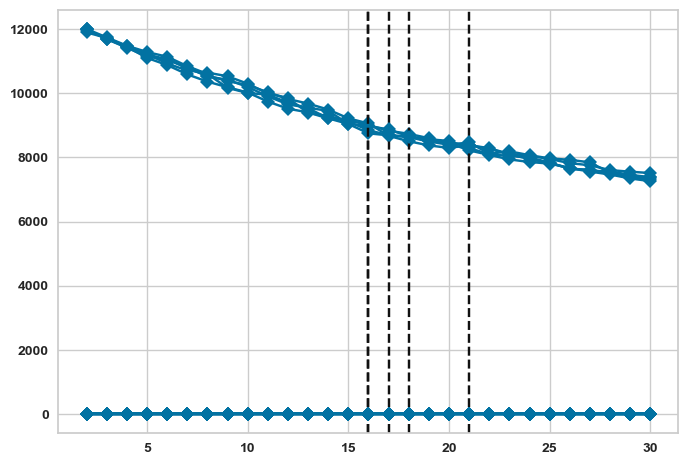

In [25]:
# ICA

ica = FastICA(n_components=27, random_state=RANDOM_STATE)
bc_ica = ica.fit_transform(bc_scaled)

ica_d = []
ica_s = []
ica_c = []
ys2 = []
cs2 = []

for seed in seeds:

    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,31), timings=False)
    visualizer.fit(bc_ica)
    distortion2 = visualizer.k_scores_
    ica_d.append(distortion2)

    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,31), metric='silhouette', locate_elbow=False, timings=False)
    visualizer.fit(bc_ica)
    sil2 = visualizer.k_scores_
    ica_s.append(sil2)
    
    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,31), metric='calinski_harabasz', locate_elbow=False, timings=False)
    visualizer.fit(bc_ica)
    ch2 = visualizer.k_scores_
    ica_c.append(ch2)
    
    kmeans = KMeans(n_clusters=2, random_state=seed, n_init='auto')
    kmeans.fit(bc_ica)
    y_kmeans = kmeans.predict(bc_ica)
    ys2.append(y_kmeans)
    centers = kmeans.cluster_centers_
    cs2.append(centers)

y_kmeans2 = np.round(np.mean(ys2, axis=0))
centers2 = np.mean(cs2, axis=0)

distortion2 = np.mean(ica_d, axis=0)
d_elbow2 = KneeLocator(np.arange(2, 31), distortion2, curve='convex', direction='decreasing').knee
sil2 = np.mean(ica_s, axis=0)
ch2 = np.mean(ica_c, axis=0)

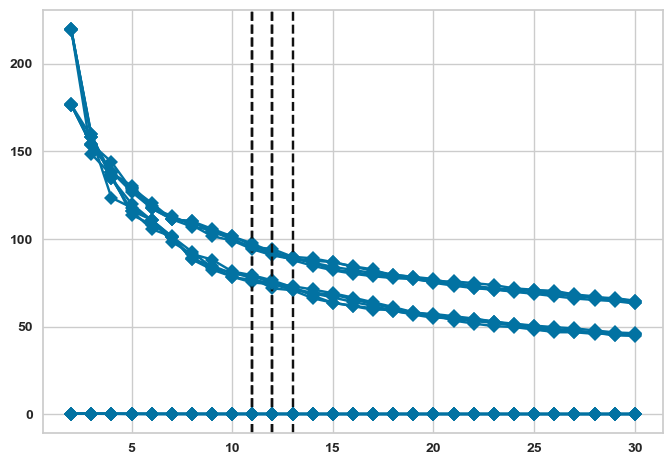

In [26]:
# Random Projection

rp = GaussianRandomProjection(n_components=30, random_state=RANDOM_STATE)
bc_rp = rp.fit_transform(bc_scaled)
# reconstructed_X = rp.inverse_transform(X_reduced)

rp_d = []
rp_s = []
rp_c = []
ys3 = []
cs3 = []

for seed in seeds:

    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,31), timings=False)
    visualizer.fit(bc_rp)
    distortion3 = visualizer.k_scores_
    rp_d.append(distortion3)

    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,31), metric='silhouette', locate_elbow=False, timings=False)
    visualizer.fit(bc_rp)
    sil3 = visualizer.k_scores_
    rp_s.append(sil3)
    
    model = KMeans(random_state=seed, n_init='auto')
    visualizer = KElbowVisualizer(model, k=(2,31), metric='calinski_harabasz', locate_elbow=False, timings=False)
    visualizer.fit(bc_rp)
    ch3 = visualizer.k_scores_
    rp_c.append(ch3)
    
    kmeans = KMeans(n_clusters=2, random_state=seed, n_init='auto')
    kmeans.fit(bc_rp)
    y_kmeans = kmeans.predict(bc_rp)
    ys3.append(y_kmeans)
    centers = kmeans.cluster_centers_
    cs3.append(centers)

y_kmeans3 = np.round(np.mean(ys3, axis=0))
centers3 = np.mean(cs3, axis=0)

distortion3 = np.mean(rp_d, axis=0)
d_elbow3 = KneeLocator(np.arange(2, 31), distortion3, curve='convex', direction='decreasing').knee
sil3 = np.mean(rp_s, axis=0)
ch3 = np.mean(rp_c, axis=0)

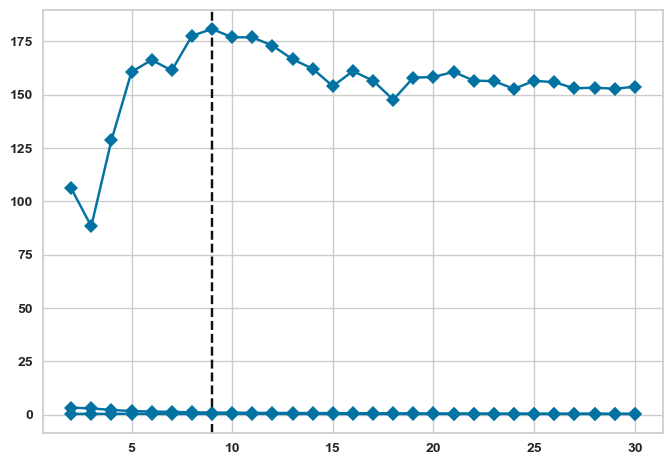

In [27]:
# LLE

lle = LocallyLinearEmbedding(n_neighbors=10, n_components=4, random_state=RANDOM_STATE, n_jobs=-1)
bc_lle = lle.fit_transform(bc_scaled)

lle_d = []
lle_s = []
lle_c = []
ys4 = []
cs4 = []


model = KMeans(random_state=seed, n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,31), timings=False)
visualizer.fit(bc_lle)
distortion4 = visualizer.k_scores_
# lle_d.append(distortion4)

model = KMeans(random_state=seed, n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,31), metric='silhouette', locate_elbow=False, timings=False)
visualizer.fit(bc_lle)
sil4 = visualizer.k_scores_
# lle_s.append(sil4)

model = KMeans(random_state=seed, n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,31), metric='calinski_harabasz', locate_elbow=False, timings=False)
visualizer.fit(bc_lle)
ch4 = visualizer.k_scores_
# lle_c.append(ch4)

kmeans = KMeans(n_clusters=5, random_state=seed, n_init='auto')
kmeans.fit(bc_lle)
y_kmeans4 = kmeans.predict(bc_lle)
# ys4.append(y_kmeans)
centers4 = kmeans.cluster_centers_
# cs4.append(centers)

# y_kmeans4 = np.round(np.mean(ys4, axis=0))
# centers4 = np.mean(cs4, axis=0)
    
# distortion4 = np.mean(lle_d, axis=0)
d_elbow4 = KneeLocator(np.arange(2, 31), distortion4, curve='convex', direction='decreasing').knee
# sil4 = np.mean(lle_s, axis=0)
# ch4 = np.mean(lle_c, axis=0)

In [28]:
diagnosis = list(bc_y['Diagnosis'])
for i in range(len(diagnosis)):
    if diagnosis[i] == 'M':
        diagnosis[i] = 1
    else:
        diagnosis[i] = 0
        
        
ri = metrics.rand_score(diagnosis, y_kmeans4)
print('Rand Index: ', ri)        
ari = metrics.adjusted_rand_score(diagnosis, y_kmeans4)
print('Adjusted Rand Index: ', ari)
ami = metrics.adjusted_mutual_info_score(diagnosis, y_kmeans4) 
print('Adjusted Mutual Info Score: ', ami)
nmi = metrics.normalized_mutual_info_score(diagnosis, y_kmeans4)  
print('Normalized Mutual Info Score: ', nmi)
homo = metrics.homogeneity_score(diagnosis, y_kmeans4)
print('Homogeneity Score: ', homo)
cs = metrics.completeness_score(diagnosis, y_kmeans4)
print('Completeness Score: ', cs)
v = metrics.v_measure_score(diagnosis, y_kmeans4)
print('V Measure Score: ', v)

Rand Index:  0.7007503509706153
Adjusted Rand Index:  0.4109782384516318
Adjusted Mutual Info Score:  0.3737441734187344
Normalized Mutual Info Score:  0.3767885531496992
Homogeneity Score:  0.5286170006331606
Completeness Score:  0.2927153607834337
V Measure Score:  0.3767885531496992


In [29]:
ri = metrics.rand_score(BC_clusters, y_kmeans4)
print('Rand Index: ', ri)        
ari = metrics.adjusted_rand_score(BC_clusters, y_kmeans4)
print('Adjusted Rand Index: ', ari)
ami = metrics.adjusted_mutual_info_score(BC_clusters, y_kmeans4) 
print('Adjusted Mutual Info Score: ', ami)
nmi = metrics.normalized_mutual_info_score(BC_clusters, y_kmeans4)  
print('Normalized Mutual Info Score: ', nmi)
homo = metrics.homogeneity_score(BC_clusters, y_kmeans4)
print('Homogeneity Score: ', homo)
cs = metrics.completeness_score(BC_clusters, y_kmeans4)
print('Completeness Score: ', cs)
v = metrics.v_measure_score(BC_clusters, y_kmeans4)
print('V Measure Score: ', v)

Rand Index:  0.47665198237885464
Adjusted Rand Index:  -0.01172372695085534
Adjusted Mutual Info Score:  -0.001259004347815033
Normalized Mutual Info Score:  0.0037277331428001844
Homogeneity Score:  0.005427567206776482
Completeness Score:  0.002838695534724566
V Measure Score:  0.0037277331428001836


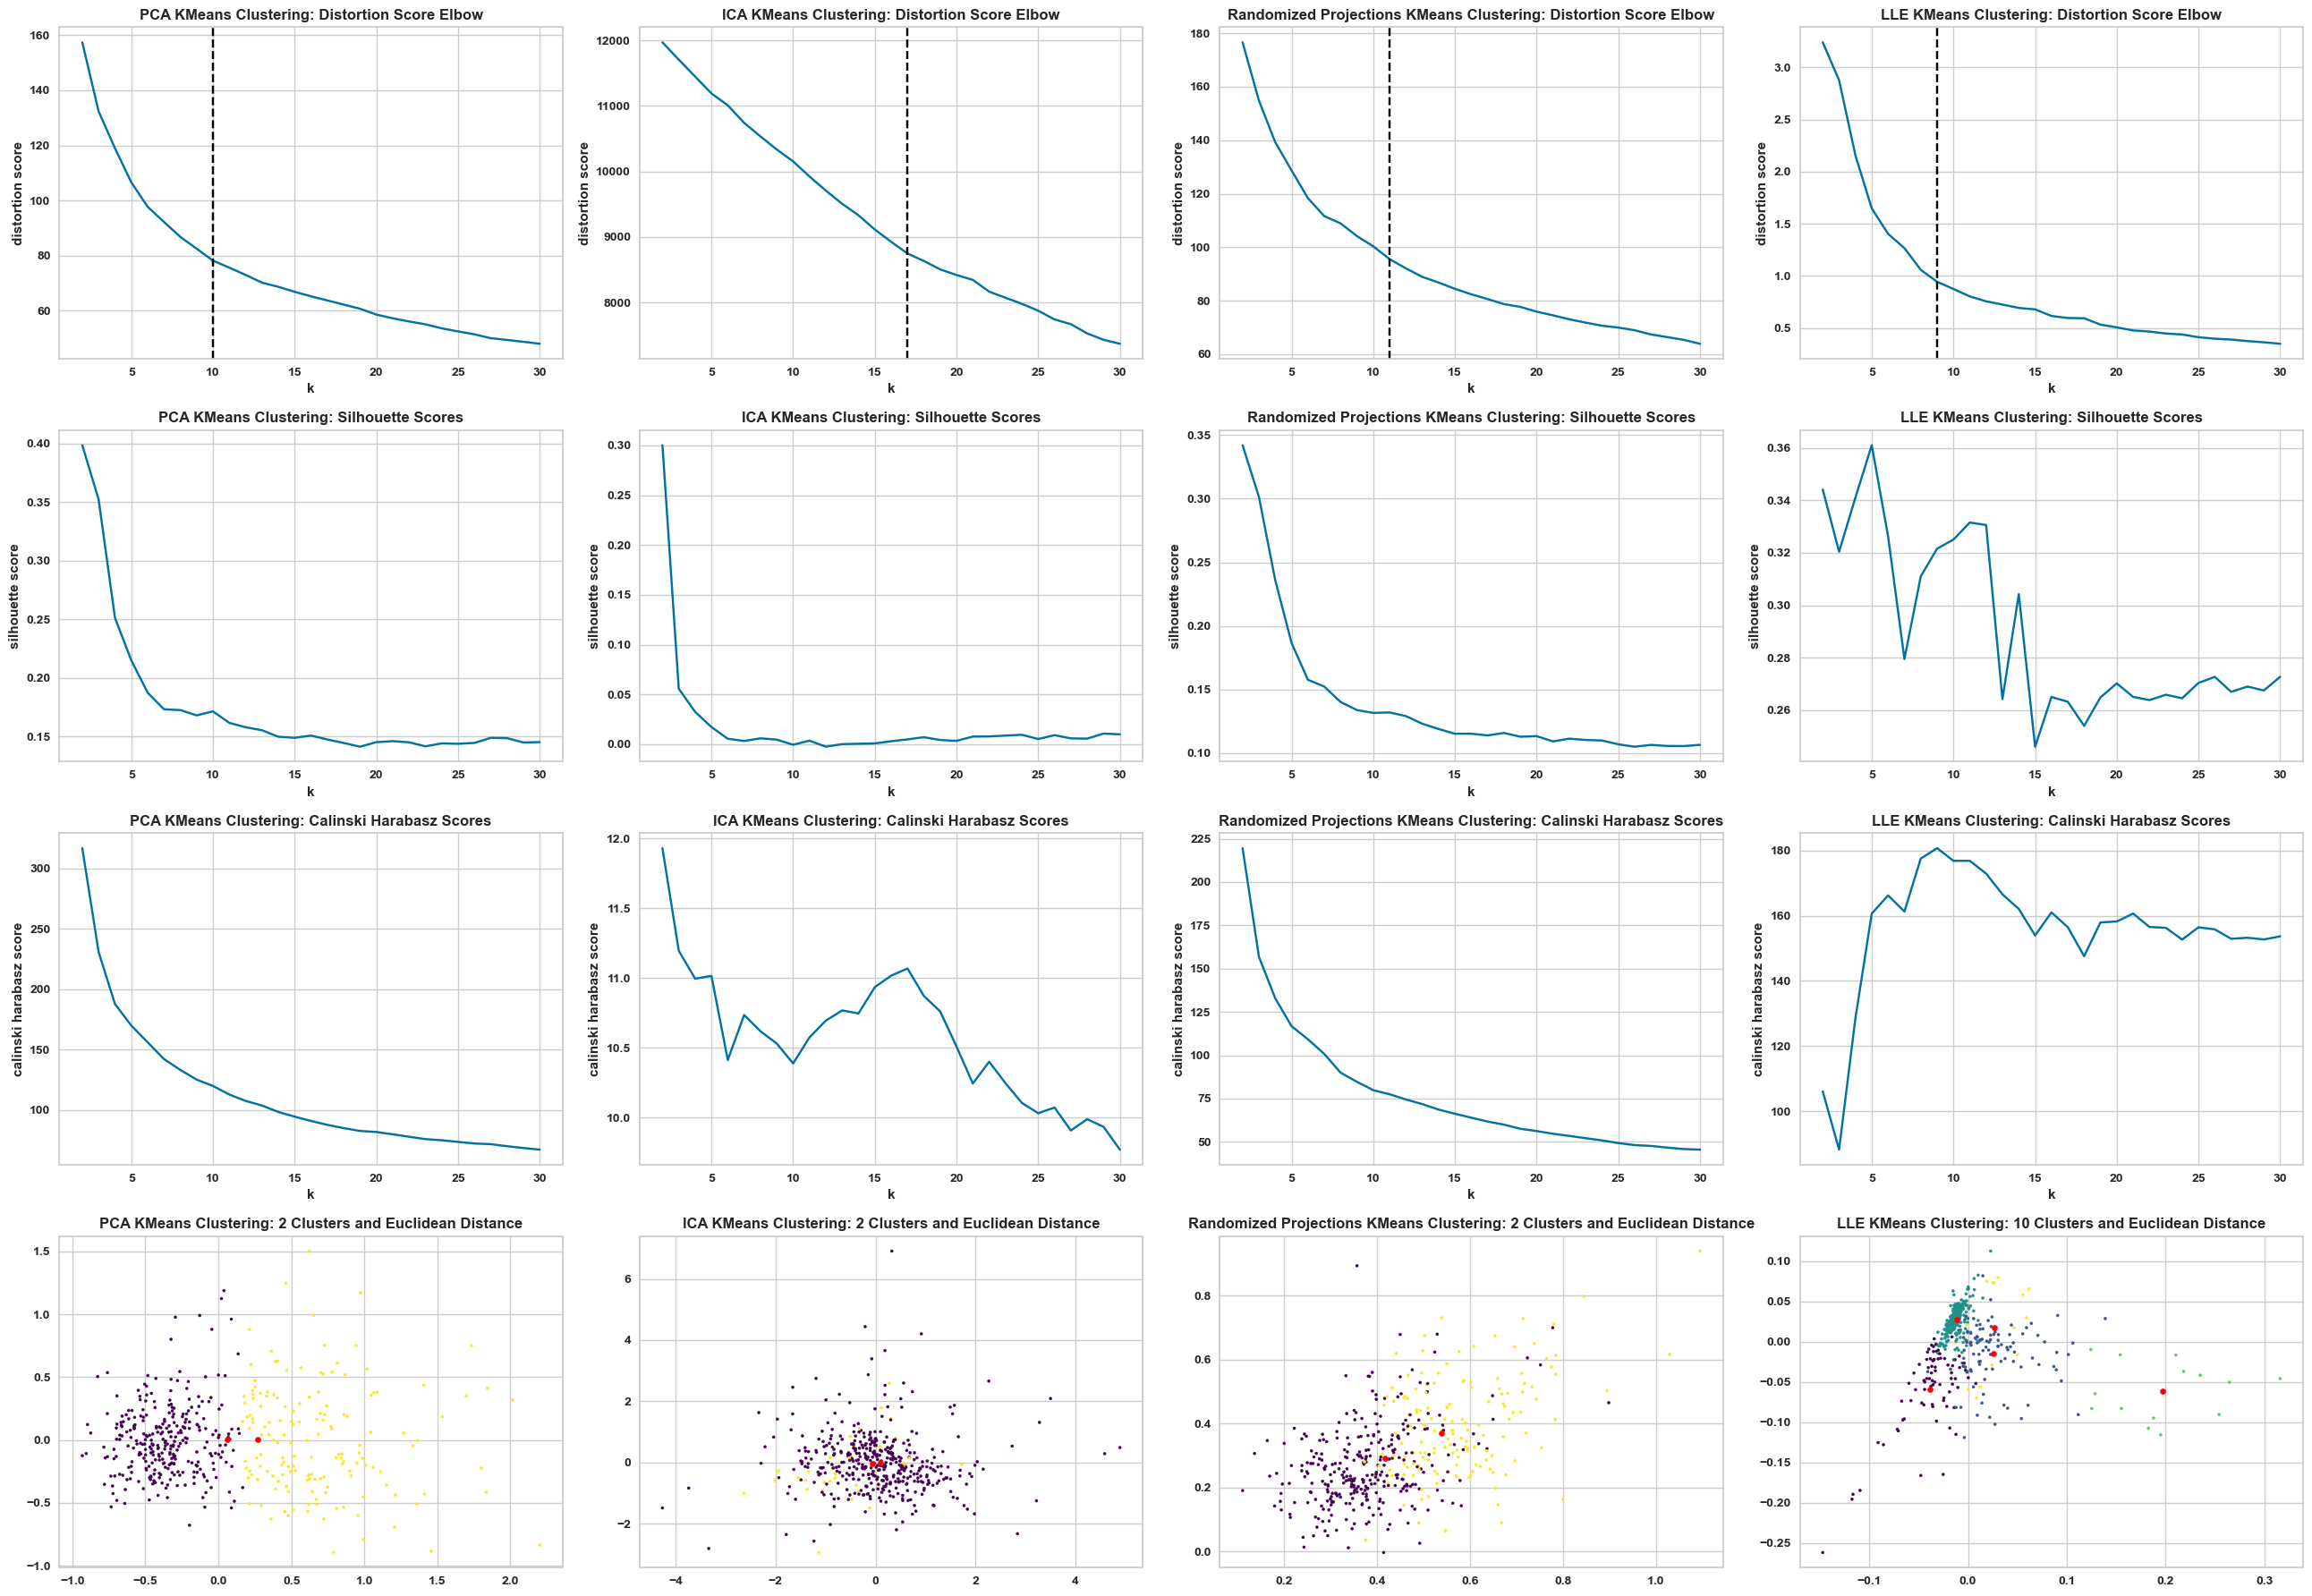

In [30]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16)) = plt.subplots(4, 4, figsize=(26, 18))
rcParams['font.weight'] = 'bold'
legend_properties = {'weight':'bold'}

###### PCA ######

pca_range = np.arange(2, 31)
ax1.plot(pca_range, distortion1, color='b')
ax1.axvline(x = d_elbow1, color='black', linestyle='--')
ax1.set_title('PCA KMeans Clustering: Distortion Score Elbow', weight='bold')
ax1.set_ylabel('distortion score', weight='bold')
ax1.set_xlabel('k', weight='bold')
ax1.grid(True)

ax5.plot(pca_range, sil1, color='b')
ax5.set_title('PCA KMeans Clustering: Silhouette Scores', weight='bold')
ax5.set_ylabel('silhouette score', weight='bold')
ax5.set_xlabel('k', weight='bold')
ax5.grid(True)

ax9.plot(pca_range, ch1, color='b')
ax9.set_title('PCA KMeans Clustering: Calinski Harabasz Scores', weight='bold')
ax9.set_ylabel('calinski harabasz score', weight='bold')
ax9.set_xlabel('k', weight='bold')
ax9.grid(True)

ax13.scatter(bc_pca[:, 0], bc_pca[:, 1], c=y_kmeans1, cmap='viridis', s=5)
ax13.scatter(centers1[:, 0], centers1[:, 1], c='red', s=20)
ax13.set_title('PCA KMeans Clustering: 2 Clusters and Euclidean Distance', weight='bold')


###### ICA ######

ica_range = np.arange(2, 31)
ax2.plot(ica_range, distortion2, color='b')
ax2.axvline(x = d_elbow2, color='black', linestyle='--')
ax2.set_title('ICA KMeans Clustering: Distortion Score Elbow', weight='bold')
ax2.set_ylabel('distortion score', weight='bold')
ax2.set_xlabel('k', weight='bold')
ax2.grid(True)

ax6.plot(ica_range, sil2, color='b')
ax6.set_title('ICA KMeans Clustering: Silhouette Scores', weight='bold')
ax6.set_ylabel('silhouette score', weight='bold')
ax6.set_xlabel('k', weight='bold')
ax6.grid(True)

ax10.plot(ica_range, ch2, color='b')
ax10.set_title('ICA KMeans Clustering: Calinski Harabasz Scores', weight='bold')
ax10.set_ylabel('calinski harabasz score', weight='bold')
ax10.set_xlabel('k', weight='bold')
ax10.grid(True)

ax14.scatter(bc_ica[:, 0], bc_ica[:, 1], c=y_kmeans2, cmap='viridis', s=5)
ax14.scatter(centers2[:, 0], centers2[:, 1], c='red', s=20)
ax14.set_title('ICA KMeans Clustering: 2 Clusters and Euclidean Distance', weight='bold')


###### Randomized Projections #######

rp_range = np.arange(2, 31)
ax3.plot(rp_range, distortion3, color='b')
ax3.axvline(x = d_elbow3, color='black', linestyle='--')
ax3.set_title('Randomized Projections KMeans Clustering: Distortion Score Elbow', weight='bold')
ax3.set_ylabel('distortion score', weight='bold')
ax3.set_xlabel('k', weight='bold')
ax3.grid(True)

ax7.plot(rp_range, sil3, color='b')
ax7.set_title('Randomized Projections KMeans Clustering: Silhouette Scores', weight='bold')
ax7.set_ylabel('silhouette score', weight='bold')
ax7.set_xlabel('k', weight='bold')
ax7.grid(True)

ax11.plot(rp_range, ch3, color='b')
ax11.set_title('Randomized Projections KMeans Clustering: Calinski Harabasz Scores', weight='bold')
ax11.set_ylabel('calinski harabasz score', weight='bold')
ax11.set_xlabel('k', weight='bold')
ax11.grid(True)

ax15.scatter(bc_rp[:, 0], bc_rp[:, 1], c=y_kmeans3, cmap='viridis', s=5)
ax15.scatter(centers3[:, 0], centers3[:, 1], c='red', s=20)
ax15.set_title('Randomized Projections KMeans Clustering: 2 Clusters and Euclidean Distance', weight='bold')

###### LLE ######

lle_range = np.arange(2, 31)
ax4.plot(lle_range, distortion4, color='b')
ax4.axvline(x = d_elbow4, color='black', linestyle='--')
ax4.set_title('LLE KMeans Clustering: Distortion Score Elbow', weight='bold')
ax4.set_ylabel('distortion score', weight='bold')
ax4.set_xlabel('k', weight='bold')
ax4.grid(True)

ax8.plot(lle_range, sil4, color='b')
ax8.set_title('LLE KMeans Clustering: Silhouette Scores', weight='bold')
ax8.set_ylabel('silhouette score', weight='bold')
ax8.set_xlabel('k', weight='bold')
ax8.grid(True)

ax12.plot(lle_range, ch4, color='b')
ax12.set_title('LLE KMeans Clustering: Calinski Harabasz Scores', weight='bold')
ax12.set_ylabel('calinski harabasz score', weight='bold')
ax12.set_xlabel('k', weight='bold')
ax12.grid(True)

ax16.scatter(bc_lle[:, 0], bc_lle[:, 1], c=y_kmeans4, cmap='viridis', s=5)
ax16.scatter(centers4[:, 0], centers4[:, 1], c='red', s=20)
ax16.set_title('LLE KMeans Clustering: 10 Clusters and Euclidean Distance', weight='bold')

fig.tight_layout()
plt.savefig(f'plots/dim_red_clustering/bc_kmeans.png', dpi=1200)
plt.show()

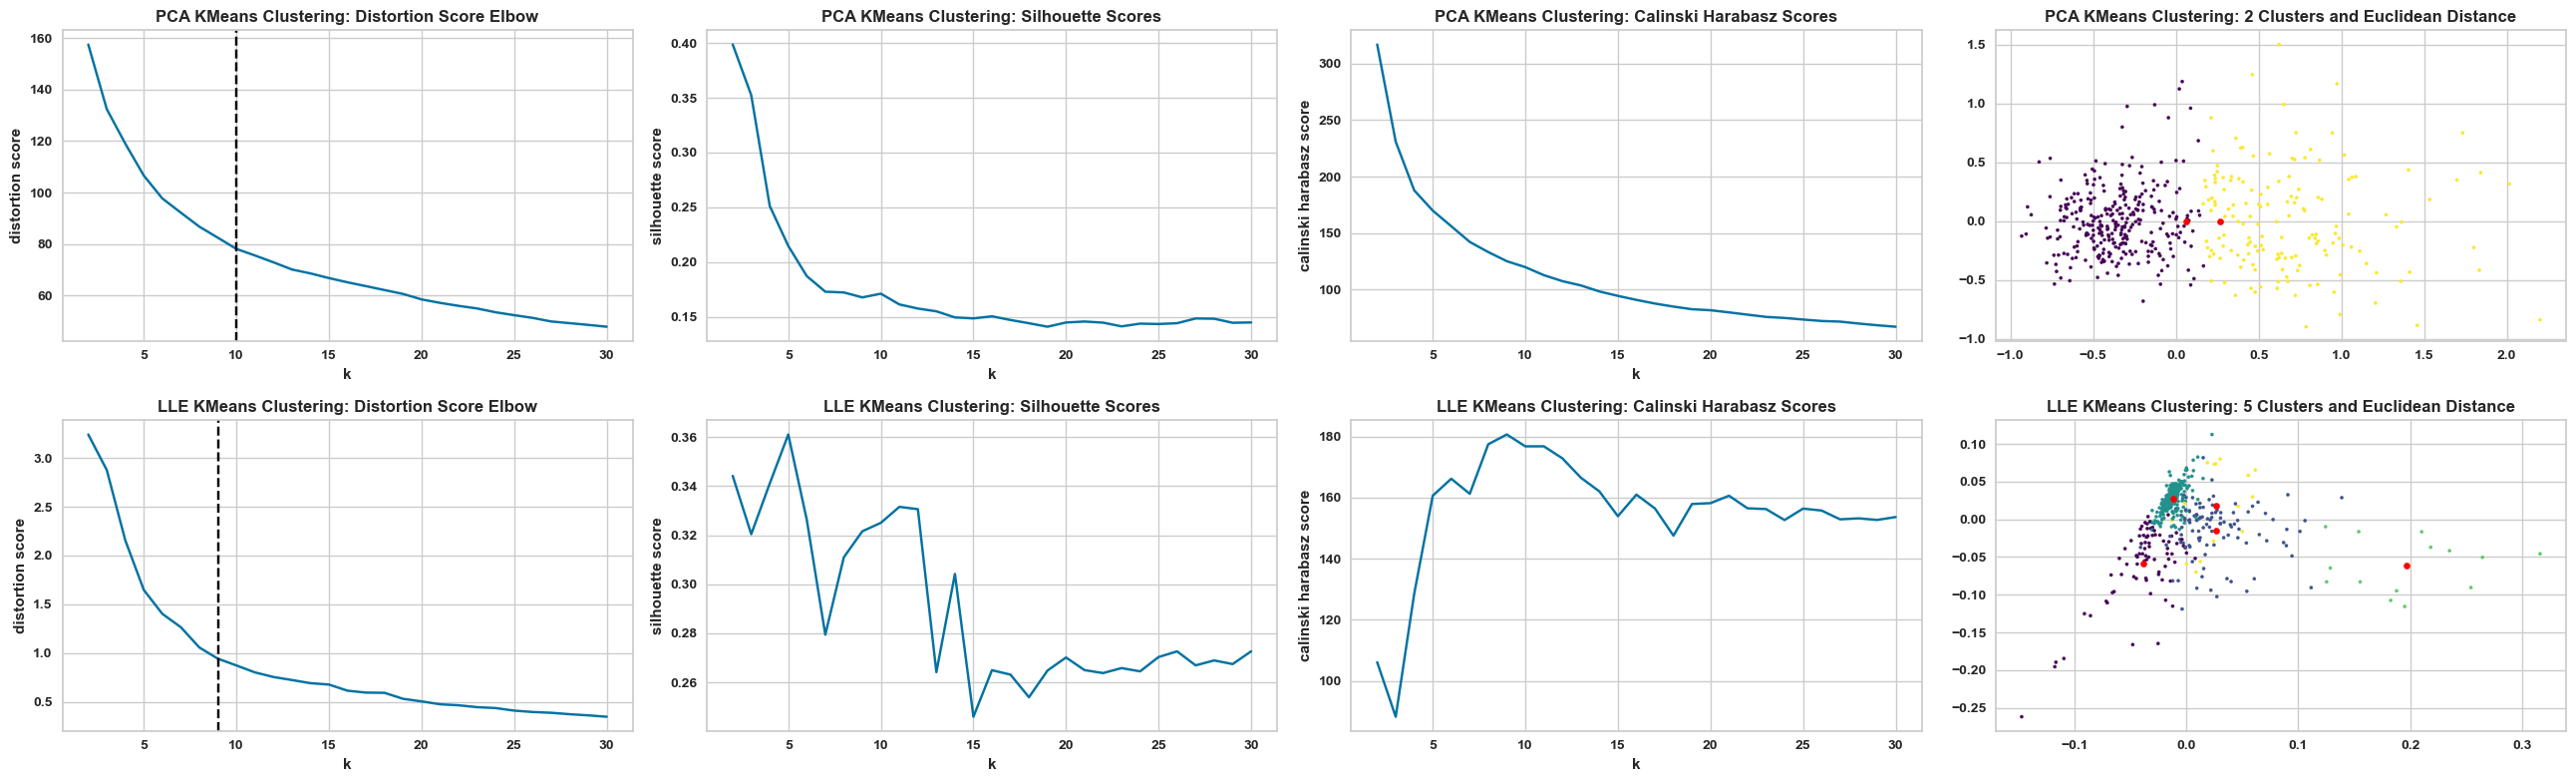

In [31]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(26, 8))
rcParams['font.weight'] = 'bold'
legend_properties = {'weight':'bold'}

###### PCA ######
pca_range = np.arange(2, 31)
ax1.plot(pca_range, distortion1, color='b')
ax1.axvline(x = d_elbow1, color='black', linestyle='--')
ax1.set_title('PCA KMeans Clustering: Distortion Score Elbow', weight='bold')
ax1.set_ylabel('distortion score', weight='bold')
ax1.set_xlabel('k', weight='bold')
ax1.grid(True)

ax2.plot(pca_range, sil1, color='b')
ax2.set_title('PCA KMeans Clustering: Silhouette Scores', weight='bold')
ax2.set_ylabel('silhouette score', weight='bold')
ax2.set_xlabel('k', weight='bold')
ax2.grid(True)

ax3.plot(pca_range, ch1, color='b')
ax3.set_title('PCA KMeans Clustering: Calinski Harabasz Scores', weight='bold')
ax3.set_ylabel('calinski harabasz score', weight='bold')
ax3.set_xlabel('k', weight='bold')
ax3.grid(True)

ax4.scatter(bc_pca[:, 0], bc_pca[:, 1], c=y_kmeans1, cmap='viridis', s=5)
ax4.scatter(centers1[:, 0], centers1[:, 1], c='red', s=20)
ax4.set_title('PCA KMeans Clustering: 2 Clusters and Euclidean Distance', weight='bold')

###### LLE ######

lle_range = np.arange(2, 31)
ax5.plot(lle_range, distortion4, color='b')
ax5.axvline(x = d_elbow4, color='black', linestyle='--')
ax5.set_title('LLE KMeans Clustering: Distortion Score Elbow', weight='bold')
ax5.set_ylabel('distortion score', weight='bold')
ax5.set_xlabel('k', weight='bold')
ax5.grid(True)

ax6.plot(lle_range, sil4, color='b')
ax6.set_title('LLE KMeans Clustering: Silhouette Scores', weight='bold')
ax6.set_ylabel('silhouette score', weight='bold')
ax6.set_xlabel('k', weight='bold')
ax6.grid(True)

ax7.plot(lle_range, ch4, color='b')
ax7.set_title('LLE KMeans Clustering: Calinski Harabasz Scores', weight='bold')
ax7.set_ylabel('calinski harabasz score', weight='bold')
ax7.set_xlabel('k', weight='bold')
ax7.grid(True)

ax8.scatter(bc_lle[:, 0], bc_lle[:, 1], c=y_kmeans4, cmap='viridis', s=5)
ax8.scatter(centers4[:, 0], centers4[:, 1], c='red', s=20)
ax8.set_title('LLE KMeans Clustering: 5 Clusters and Euclidean Distance', weight='bold')

plt.tight_layout()
plt.savefig(f'plots/dim_red_clustering/bc_kmeans_mini.png', dpi=600)
plt.show()

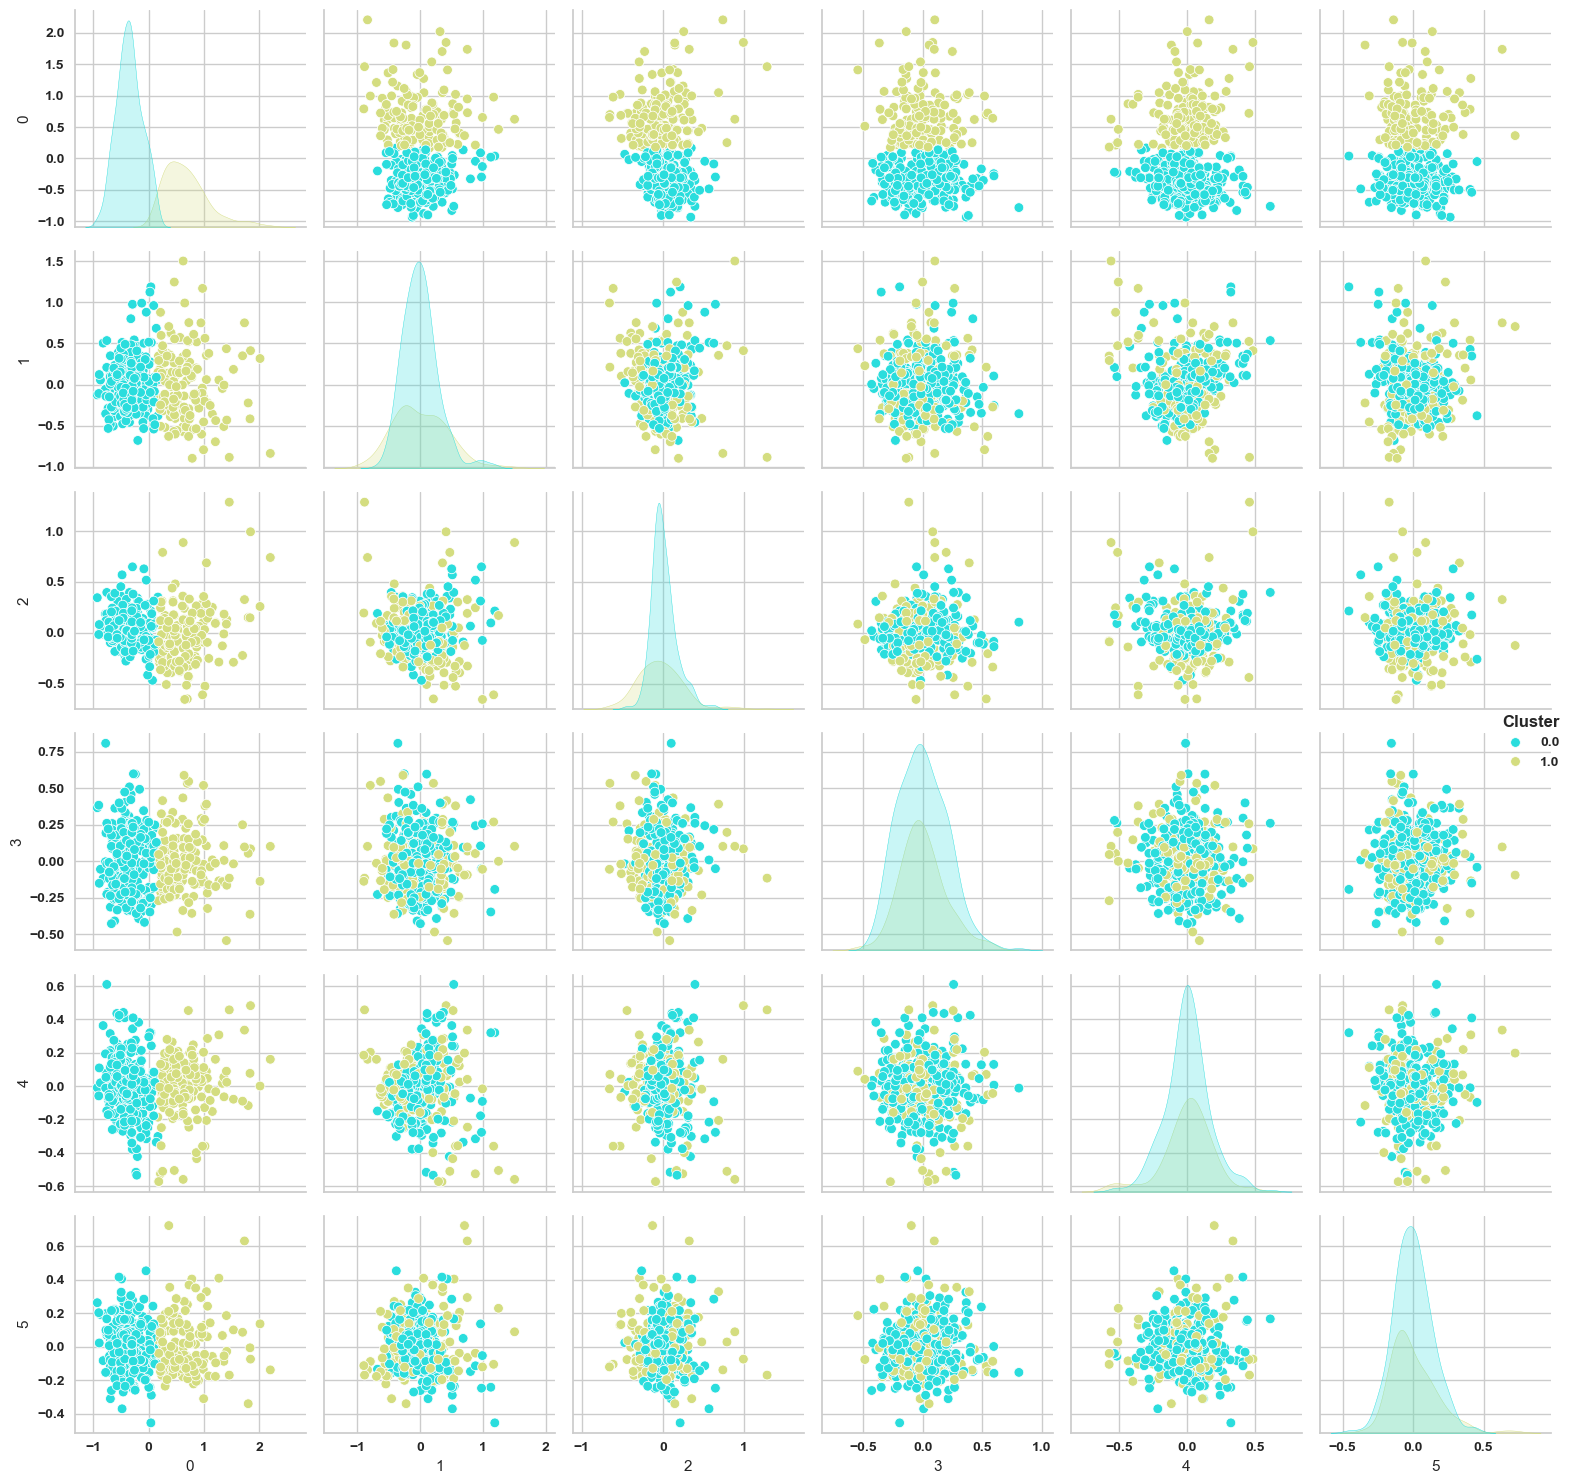

In [32]:
# PCA Pairplot
bc_df = pd.DataFrame(bc_pca)
bc_df['Cluster'] = y_kmeans1
g = sns.pairplot(bc_df, hue="Cluster", palette='rainbow')
plt.tight_layout()
plt.savefig(f'plots/dim_red_clustering/bc_kmeans_pca_pairplot.png', dpi=600)

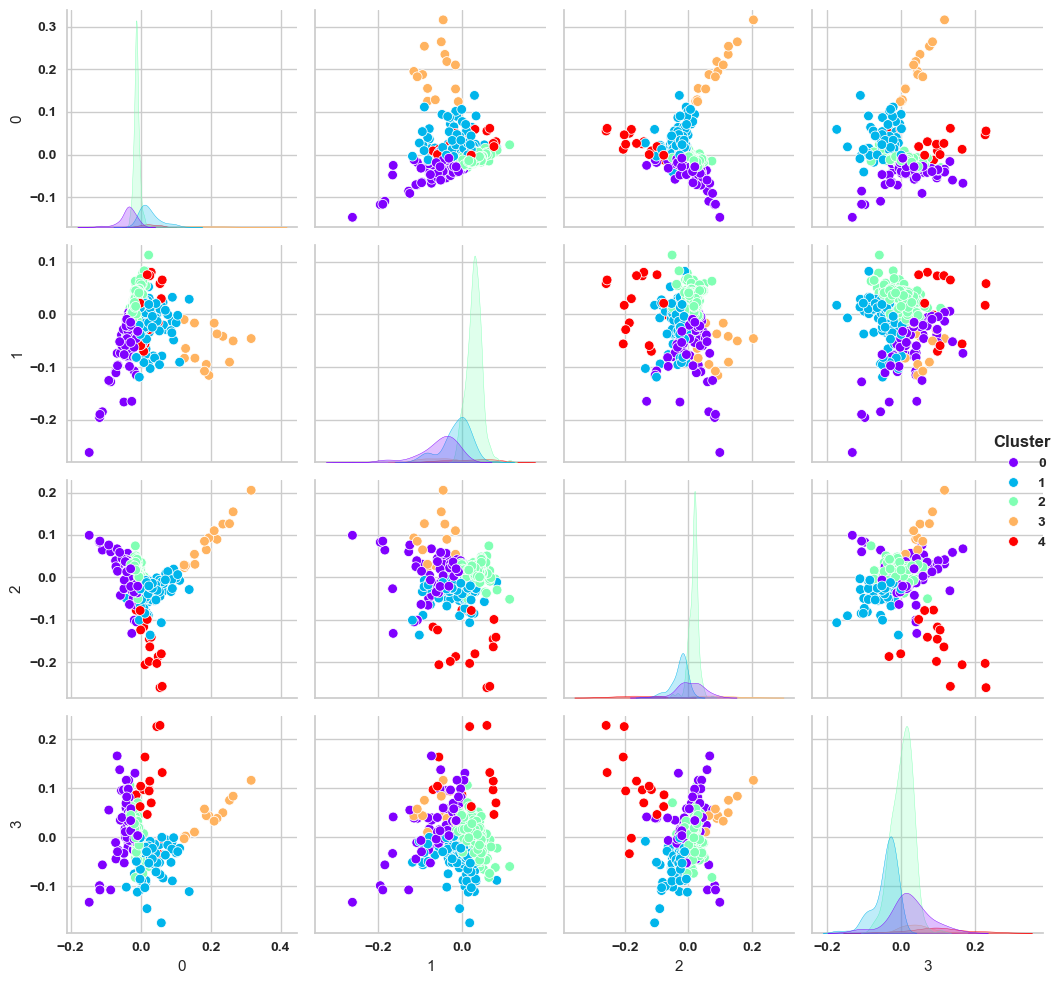

In [33]:
# LLE Pairplot
bc_df = pd.DataFrame(bc_lle)
bc_df['Cluster'] = y_kmeans4
g = sns.pairplot(bc_df, hue="Cluster", palette='rainbow')
plt.tight_layout()
plt.savefig(f'plots/dim_red_clustering/bc_kmeans_lle_pairplot.png', dpi=600)